In [7]:
import pandas as pd
import numpy as np

In [26]:
selected_columns = ['Indv. CODE', 'HOUSE_n_or', 'House_n_gl', 'G_H00K', 
                    , 'sum_G_HOOK', 'num_indiv', 
                    'Electricit', 'Radio', 'Domestic animals', 'Toilet', 
                    'Drinking w', 'Drinking_1', 'Bath', 'Water cook', 
                    'Hand washi', 'NDVI', 'ri_bfd', 'ri_orcd_n', 'BSI_n', 
                    'MSI_n', 'NDBI_n', 'BLDFIE_n', 'BDRIC_n', 'CECSOL_n', 
                    'Clyp_n', 'Crfvol_n', 'Ocstha_n', 'SLTppt_n', 'Phihox_n', 'Phikcl_n']

In [12]:
base_path = '../data/geohelmints_base.csv'

In [5]:
column_types = {
    'GENDER': 'category', 
    'AGE': 'float64', 
    're_G_trich': 'category', 
    're_G_Asc': 'category', 
    're_G_Hook': 'category', 
    're_H_Enter': 'category',
    're_H_Schis': 'category', 
    're_H_Hym_n': 'category', 
    're_H_Hym_d': 'category', 
    'sum_G_Stro': 'float64', 
    'sum_G_Tric': 'float64',
    'sum_G_Asc': 'float64', 
    'sum_G_HOOK': 'float64', 
    'sum_H_Ente': 'float64', 
    'sum_H_Schi': 'float64', 
    'sum_H_Hym_': 'float64',
    'sum_H_Hy_1': 'float64', 
    'si_G_Stron': 'category', 
    'si_G_Trich': 'category', 
    'si_G_Asc': 'category', 
    'si_G_Hook': 'category',
    'si_H_Enter': 'category', 
    'si_H_schis': 'category', 
    'si_H_hym_n': 'category', 
    'si_H_hym_d': 'category', 
    'riq_Geoh': 'float64',
    'riq_helm': 'float64', 
    'p_G_Strong': 'float64', 
    'p_G_Trich': 'float64', 
    'p_G_Asc': 'float64', 
    'p_G_HOOK': 'float64',
    'p_H_Enter': 'float64', 
    'p_H_Schis': 'float64', 
    'p_H_hym_n': 'float64', 
    'p_H_hym_d': 'float64', 
    'sh_geohel': 'float64',
    'sh_helm': 'float64', 
    'geohel_dom': 'category', 
    'Re_hous_nu': 'float64', 
    'num_indiv': 'float64', 
    're_G_stron': 'category',
       'ind_tip1_G': 'category', 
    'ind_tip1_H': 'category', 
    'p_tip1_G': 'float64', 
    'p_tip1_H': 'float64', 
    'ind_inf_Ge': 'float64',
    'ind_inf_He': 'float64', 
    'n_Geo_mean': 'float64', 
    'n_Hel_mean': 'float64', 
    'HOOKWORM_h': 'float64', 
    'HGH_x_50': 'float64',
    'r_huev_hoo': 'float64', 
    'Roof': 'category', 
    'Floor': 'category', 
    'Wall': 'category', 
    'Electricit': 'category', 
    'Radio': 'category',
    'Domestic a': 'category', 
    'Toilet': 'category', 
    'Drinking w': 'category', 
    'Drinking_1': 'category', 
    'Bath': 'category',
    'Water cook': 'category', 
    'Hand washi': 'category', 
    'Miembros_': 'float64', 
    'n_geo_stde': 'float64', 
    'n_Hel_stde': 'float64',
    're_hgh50': 'float64', 
    'sum_hgh50': 'float64', 
    'Prev_FO': 'float64', 
    'Prev_piel': 'float64', 
    'riego_ingr': 'float64',
    'riesgo_ele': 'category', 
    'Riesgo_wat': 'category', 
    'rieg_w2': 'category', 
    'riesg_w_2': 'category', 
    'riesg_w_3': 'category',
    'Ri_ingre': 'float64', 
    'NDVI': 'float64', 
    'Prec': 'float64', 
    'ri_bfd': 'float64', 
    'ri_orcd_n': 'float64', 
    'Ri_prec': 'float64',
    'Ri_NumInd': 'float64', 
    'BSI_n': 'float64', 
    'MSI_n': 'float64', 
    'NDBI_n': 'float64', 
    'BLDFIE_n': 'float64', 
    'BDRIC_n': 'float64',
    'CECSOL_n': 'float64', 
    'Clyp_n': 'float64', 
    'Crfvol_n': 'float64', 
    'Ocstha_n': 'float64', 
    'SLTppt_n': 'float64', 
    'Phihox_n': 'float64',
    'Phikcl_n': 'float64', 
    'Temp_n': 'float64'
}

In [18]:
raw_df = pd.read_csv(base_path, dtype=column_types, header=0, na_values=[' ', '*', ''])

#### Sacamos las ultimas dos filas porque no van 

In [52]:
sin_ultimas_dos = len(raw_df) - 3
filtered_base = raw_df.loc[:sin_ultimas_dos, selected_columns]

### Creamos Nuevas Features 

#### Creamos las aldeas 

In [59]:
# La aldea es representada por las primeras lestras del codigo del individuo
filtered_base['aldea'] = filtered_base['Indv. CODE'].apply(lambda x: x[:2])

#### Creamos la media de las distancias de cada aldea 

In [63]:
mean_distances = {
    'SE': 911,
    'ZE': 372,
    'MA': 369
}

In [64]:
def get_distances(row):
    aldea = row['aldea']
    return mean_distances[aldea]

In [66]:
filtered_base['mean_distance'] = filtered_base.apply(lambda x: get_distances(x), axis=1)

### Media de prevalencia por casa 

In [188]:
target_feature = 'sum_G_HOOK'

## Agrupamos por casa 

In [189]:
filtered_by_house = filtered_base.groupby('HOUSE_n_or').first()

#### Vemos el target por casa 

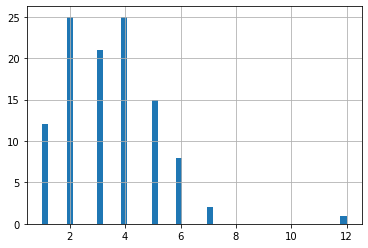

In [177]:
filtered_by_house['num_indiv'].hist(bins=50)

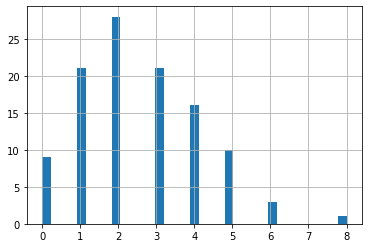

In [190]:
filtered_by_house[target_feature].hist(bins=35)

In [193]:
filtered_by_house = filtered_by_house.drop(columns=['mean_prevalence'])

### Dividimos entre target y features 

In [217]:
target = filtered_by_house[target_feature]
features = filtered_by_house.drop(columns=[target_feature])

### Fix nan values 

In [235]:
features['Drinking w'] = features['Drinking w'].fillna('Well')
features.Drinking_1 = features.Drinking_1.fillna('River')
features.Bath = features.Bath.fillna('River')
features['Water cook'] = features['Water cook'].fillna('River')
features['Hand washi'] = features['Hand washi'].fillna('River')
features.Radio = features.Radio.fillna('0')

## Encode Categorical data 

Las que se puede, vamos a encodearla con el orden natural de las caracteristicas que simbolizan

Las presencia/ausencia tambien modelan caracteristicas sociales que indican usar valores 0,1

In [218]:
toilet_encode = {'Open area/Bush': 0, 'Latrine without slate': 1}
water_encode = {'Well': 0, 'River': 1, 'Pipe line': 2, 'Treated boreholes': 3}

In [221]:
def encode_categorical_features(row):
    elec = int(row['Electricit'])
    row['Electricit'] = elec
    radio = int(row['Radio'])
    row['Radio'] = radio
    
    toilet = toilet_encode[row['Toilet']]
    row['Toilet'] = toilet
    
    drink_w = water_encode[row['Drinking w']]
    row['Drinking w'] = drink_w
    
    drink_1 = water_encode[row['Drinking_1']]
    row['Drinking_1'] = drink_1
    
    bath = water_encode[row['Bath']]
    row['Bath'] = bath
    
    water_c = water_encode[row['Water cook']]
    row['Water cook'] = water_c
    
    hand_wash = water_encode[row['Hand washi']]
    row['Hand washi'] = hand_wash
    
    
    return row


In [236]:
encoded_features = features.apply(lambda x: encode_categorical_features(x), axis=1)

In [239]:
encoded_features.columns

Index(['Indv. CODE', 'House_n_gl', 'G_H00K', 'num_indiv', 'Electricit',
       'Radio', 'Domestic animals', 'Toilet', 'Drinking w', 'Drinking_1',
       'Bath', 'Water cook', 'Hand washi', 'NDVI', 'ri_bfd', 'ri_orcd_n',
       'BSI_n', 'MSI_n', 'NDBI_n', 'BLDFIE_n', 'BDRIC_n', 'CECSOL_n', 'Clyp_n',
       'Crfvol_n', 'Ocstha_n', 'SLTppt_n', 'Phihox_n', 'Phikcl_n', 'aldea',
       'mean_distance'],
      dtype='object')